# #Assignment dataset: Super Market Sales Analytics

#### 1. Write a Data Science Proposal for achieving the objective mentioned. 

In [1]:
#Creating a classification machine learning model to predict Customer_Type,
#Which will be resulting in better targeting of products and services of Super Market, So We can achieve high sales 
#from each customers and retainsion of customers base as per their purchases pattern via campaigns/offers.


#### 2. Perform exploratory analysis on the data and describe your understanding of the data. 

## Import Libraries/Dataset

In [35]:
#Loading the Dataset
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline   
sns.set(color_codes=True)

data = pd.read_csv("Supermarket_Sales_Dataset-1.csv")
#data.columns = data.columns.str.lower().str.replace(" ", "_")
data.rename(columns = {'Invoice ID':'Invoice_ID','Customer Type':'Customer_Type','Product Type':'Product_Type','Unit Price':'Unit_Price','Selling Price':'Selling_Price','Payment Type':'Payment_Type','Cost Price':'Cost_Price','Gross Income':'Gross_Income'}, inplace = True)
data = data.drop(['Time','Invoice_ID'], axis=1)

strings = list(data.dtypes[data.dtypes == 'object'].index)
for col in strings:
    data[col] = data[col].str.lower().str.replace(" ", "_")

#Data type conversion for Date
data['Date'] = pd.to_datetime(data['Date'])
print("Count of Rows and Columns: ", data.shape)

#Note:
#In dataset we have 16 feature. 

Count of Rows and Columns:  (1000, 14)


In [36]:
#Attribute information
#Invoice id: Computer generated sales slip invoice identification number
#Branch: Branch of supercenter (3 branches are available identified by A, B and C).
#City: Location of supercenters
#Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
#Gender: Gender type of customer
#Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
#Unit price: Price of each product in $
#Quantity: Number of products purchased by customer
#Tax: Tax fee for customer buying
#Selling_Price: Total price including tax
#Date: Date of purchase (Record available from January 2019 to March 2019)
#Time: Purchase time (10am to 9pm)
#Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
#Cost_Price: Cost of goods sold
#Gross income: Gross income
#Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [37]:
data.head(5).style.background_gradient(cmap='GnBu')

,Branch,City,Customer_Type,Gender,Product_Type,Unit_Price,Quantity,Tax,Selling_Price,Date,Payment_Type,Cost_Price,Gross_Income,Rating
0,a,bangalore,member,female,health_and_beauty,74.690000,7,26.141500,548.971500,2019-01-05 00:00:00,debit_card,522.830000,26.141500,9.100000
1,c,mysore,normal,female,electronic_accessories,15.280000,5,3.820000,80.220000,2019-03-08 00:00:00,cash,76.400000,3.820000,9.600000
2,a,bangalore,normal,male,home_and_lifestyle,46.330000,7,16.215500,340.525500,2019-03-03 00:00:00,credit_card,324.310000,16.215500,7.400000
3,a,bangalore,member,male,health_and_beauty,58.220000,8,23.288000,489.048000,2019-01-27 00:00:00,debit_card,465.760000,23.288000,8.400000
4,a,bangalore,normal,male,sports_and_travel,86.310000,7,30.208500,634.378500,2019-02-08 00:00:00,debit_card,604.170000,30.208500,5.300000


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit_Price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
Tax,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Selling_Price,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65
Cost_Price,1000.0,307.587380,234.176510,10.1700,118.497500,241.760,448.90500,993.00
Gross_Income,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Rating,1000.0,6.972700,1.718580,4.0000,5.500000,7.000,8.50000,10.00


Text(0.5, 1.0, ' Types of customers(Target Feature) ')

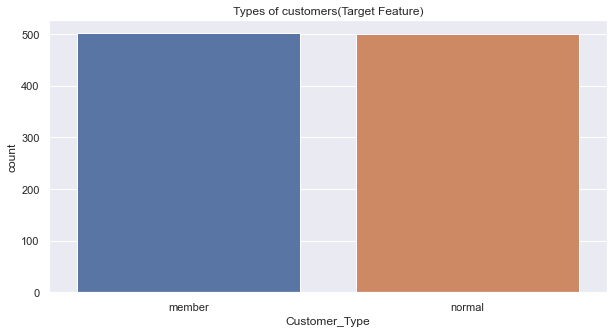

In [39]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Customer_Type', data = data)
plt.title(" Types of customers(Target Feature) ")

#Note:
#Target feature is balanced class. 

Text(0.5, 1.0, ' gross income in m by city')

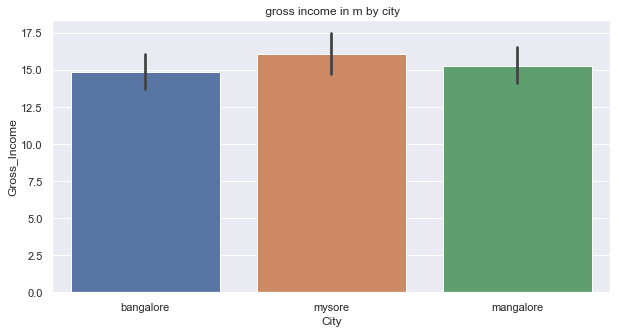

In [40]:
plt.figure(figsize= (10, 5))
sns.barplot(x= 'City', y= 'Gross_Income',data = data)
plt.title(" gross income in m by city")

#Note:
#We can see that Mysore is the leading Gross_Income city followed by Mangalore and Bangalore

Text(0.5, 1.0, 'Tax payed per city')

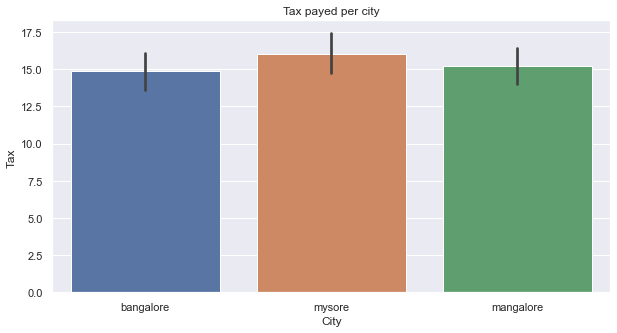

In [41]:
plt.figure(figsize= (10, 5))
sns.barplot(x= 'City',y= 'Tax ', data = data)
plt.title("Tax payed per city")

#Note:
#We can see that Mysore is the leading Tax city followed by Mangalore and Bangalore

Text(0.5, 1.0, 'Gross income  per product line')

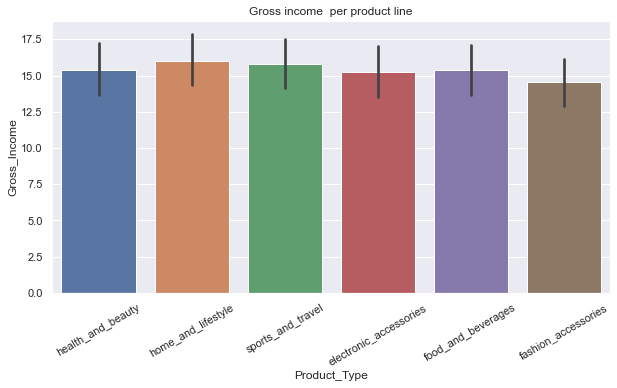

In [42]:
plt.figure(figsize= (10, 5))
plt.xticks(rotation = 30)
sns.barplot(x= 'Product_Type', y='Gross_Income', data = data, order = data.Product_Type.value_counts().sort_values(ascending = True).index)
plt.title("Gross income  per product line")

#Note:
#We can see that all Product_Type are having above 12.5 Gross_Income and below 16, Which shows all Product_Type are similar in Gross_Income

In [43]:
# df.iloc[df['gross_income'].sum()].sort_values(ascending = False).head()
Best_branch = data.groupby("Branch")['Gross_Income'].sum().sort_values(ascending = False).head()
Best_city =  data.groupby("City")['Gross_Income'].sum().sort_values(ascending = False).head()
print(Best_branch)
print(Best_city)

#Note:
#Top Branchs and City

Branch
c    5265.1765
a    5057.1605
b    5057.0320
Name: Gross_Income, dtype: float64
City
mysore       5265.1765
bangalore    5057.1605
mangalore    5057.0320
Name: Gross_Income, dtype: float64


Text(0.5, 1.0, 'Grows income distribution')

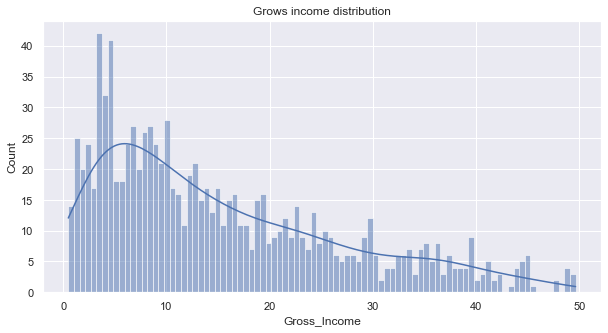

In [44]:
plt.figure(figsize = (10, 5))
sns.histplot(x=data.Gross_Income, kde= True, bins = 90)
plt.title("Grows income distribution")

#Note:
#Gross_Income is rightly skewed

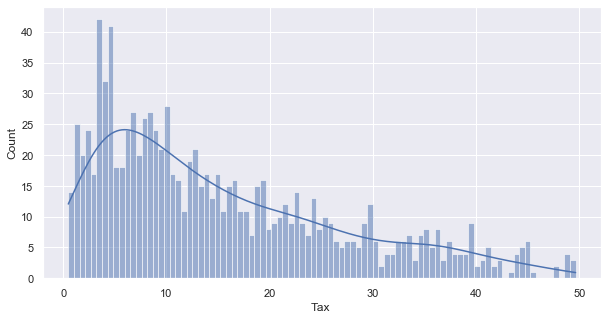

In [45]:
plt.figure(figsize = (10, 5))
sns.histplot(x=data['Tax '], kde= True, bins = 90)

#Note:
#Tax is rightly skewed

Text(0.5, 1.0, 'Unit price distribution ')

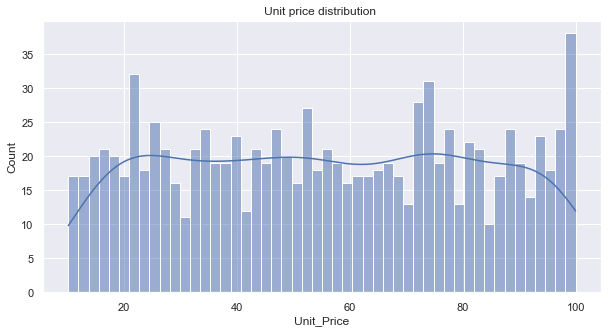

In [46]:
plt.figure(figsize = (10, 5))
sns.histplot(x=data['Unit_Price'], kde= True, bins = 50)
plt.title("Unit price distribution ")

#Note:
#Unit_Price is normal distributed

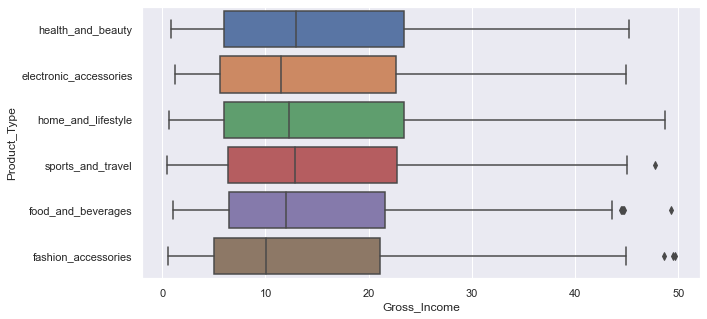

In [47]:
plt.figure(figsize = (10, 5))
sns.boxplot( y = data.Product_Type, x= data.Gross_Income)

#Note:
#Product_Type and Gross_Income boxplot distribution 

#### 3. Perform data wrangling / pre-processing. 

In [48]:
#Missing value
data.isnull().sum()

#Note:
#No NA, so no need of NA imputation

Branch           0
City             0
Customer_Type    0
Gender           0
Product_Type     0
Unit_Price       0
Quantity         0
Tax              0
Selling_Price    0
Date             0
Payment_Type     0
Cost_Price       0
Gross_Income     0
Rating           0
dtype: int64

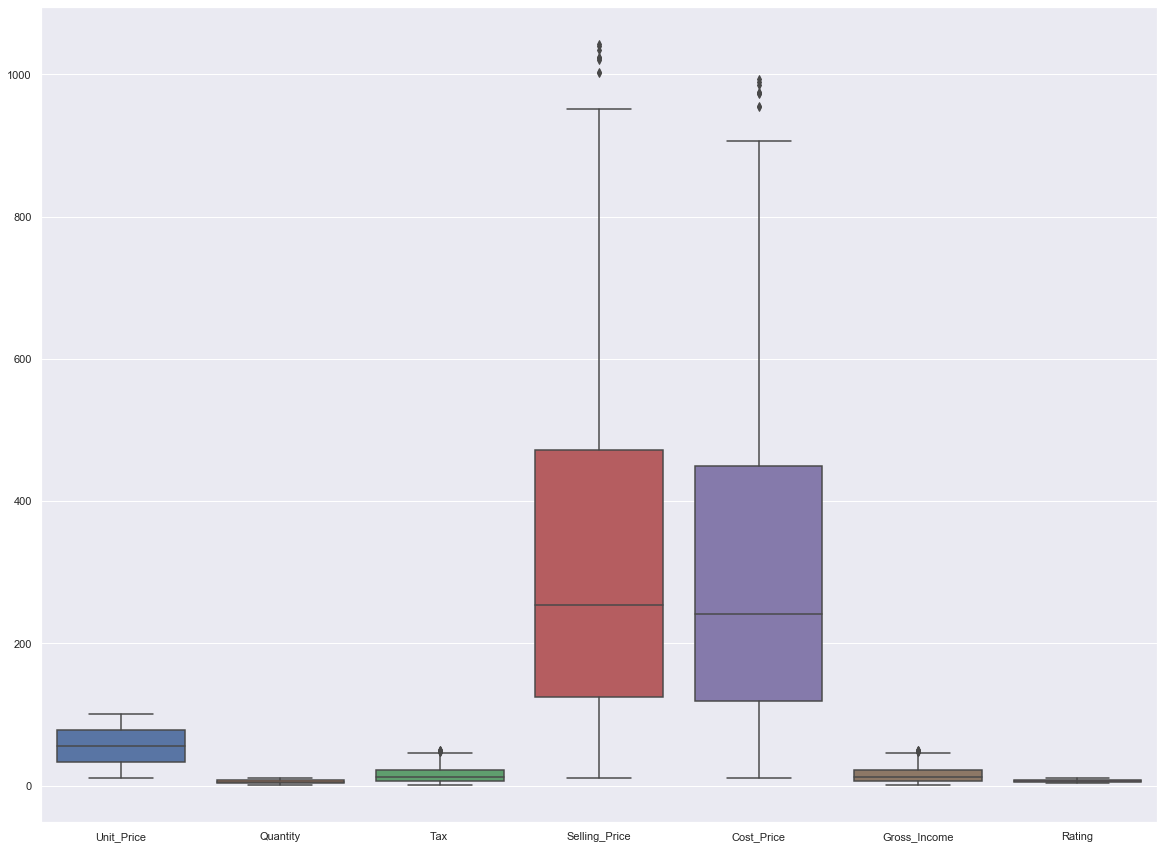

In [49]:
#Outliers
plt.figure(figsize=(20,15))
sns.boxplot(data=data)

#Note:
#Tax, Selling and Cost Price has upper tail outliers

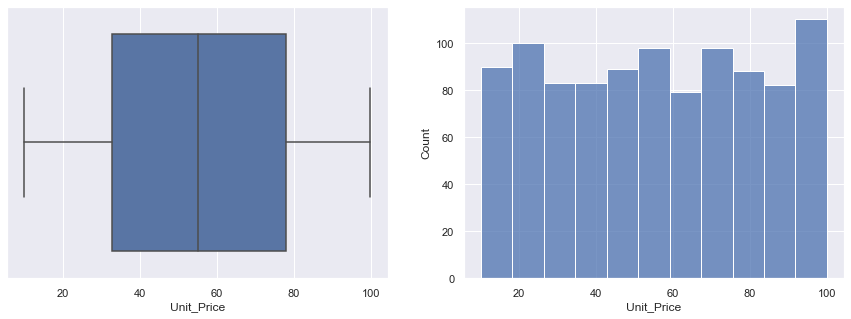

In [50]:
#Unit_Price  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Unit_Price', ax=ax[0])

#Note
#Data is normally distributed

#Unit_Price  histogram
sns.histplot(data=data, x='Unit_Price', ax=ax[1])
plt.show()
#Note
#No outliers present

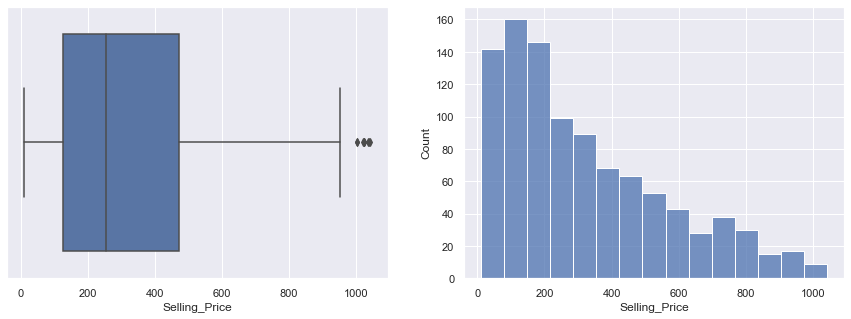

In [51]:
#Selling_Price  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Selling_Price', ax=ax[0])

#Note
#Data is rightly skewed 

#Selling_Price  histogram
sns.histplot(data=data, x='Selling_Price', ax=ax[1])
plt.show()
#Note
#Outliers present

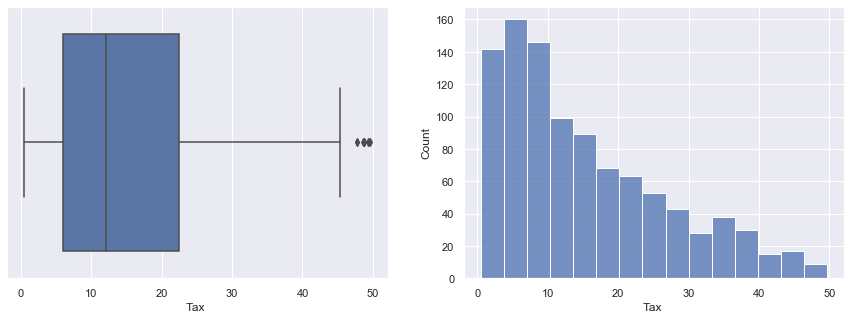

In [52]:
#Tax  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Tax ', ax=ax[0])

#Note
#Data is rightly skewed 

#Tax  histogram
sns.histplot(data=data, x='Tax ', ax=ax[1])
plt.show()
#Note
#Outliers present

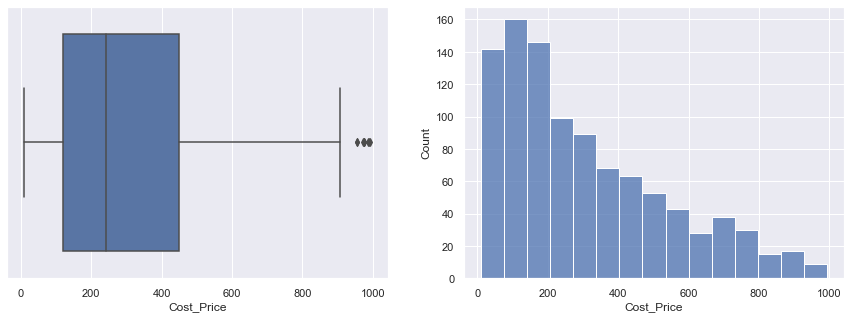

In [53]:
#Cost_Price  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Cost_Price', ax=ax[0])

#Note
#Data is rightly skewed 

#Cost_Price  histogram
sns.histplot(data=data, x='Cost_Price', ax=ax[1])
plt.show()
#Note
#Outliers present

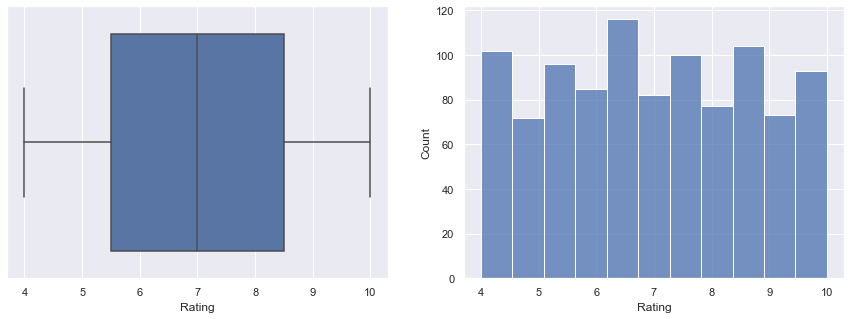

In [54]:
#Rating  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='Rating', ax=ax[0])

#Note
#Data is normally distributed

#Rating  histogram
sns.histplot(data=data, x='Rating', ax=ax[1])
plt.show()
#Note
#No outliers present

In [55]:
#Treatment for outliers values: Selling_Price
Q1=data['Selling_Price'].quantile(0.25)
Q3=data['Selling_Price'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Selling_Price'] = np.where((data['Selling_Price']>Upper_Whisker),data['Selling_Price'].quantile(0.90),
                             np.where((data['Selling_Price']<Lower_Whisker),data['Selling_Price'].quantile(0.10),data['Selling_Price']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [56]:
#Treatment for outliers values: Tax
Q1=data['Tax '].quantile(0.25)
Q3=data['Tax '].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Tax '] = np.where((data['Tax ']>Upper_Whisker),data['Tax '].quantile(0.90),
                             np.where((data['Tax ']<Lower_Whisker),data['Tax '].quantile(0.10),data['Tax ']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [57]:
#Treatment for outliers values: Cost_Price
Q1=data['Cost_Price'].quantile(0.25)
Q3=data['Cost_Price'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['Cost_Price'] = np.where((data['Cost_Price']>Upper_Whisker),data['Cost_Price'].quantile(0.90),
                             np.where((data['Cost_Price']<Lower_Whisker),data['Cost_Price'].quantile(0.10),data['Cost_Price']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [58]:
#Features extration from Date columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day_name()

#Note:
#Year,Month and Day features extrated from Date

C:\Users\inkri\.conda\envs\projects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


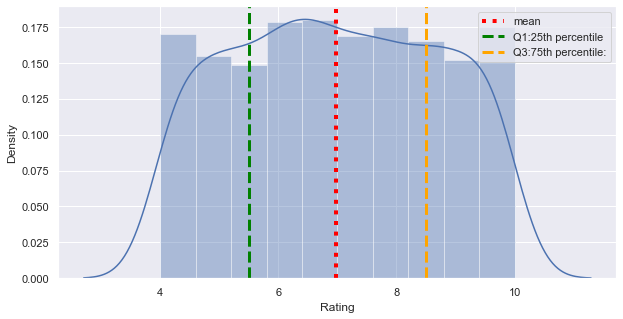

In [59]:
plt.figure(figsize=(10,5))
sns.distplot(data.Rating)
plt.axvline(x=data.Rating.mean(),label='mean',color='red', linestyle='dotted',lw=4)
plt.axvline(x=np.percentile(data['Rating'],25),label = 'Q1:25th percentile',color='green', linestyle='dashed',lw=3)
plt.axvline(x=np.percentile(data['Rating'],75),label = 'Q3:75th percentile:',color='orange', linestyle='dashed',lw=3 )
plt.legend()
plt.show()

#Note:
#Rating distribution is normal

In [60]:
dat = data

In [61]:
#Standardize the Variables: on Train dataset
from sklearn.preprocessing import StandardScaler
col_names = ['Unit_Price', 'Quantity', 'Tax ','Selling_Price','Cost_Price', 'Gross_Income']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
data = data.drop(['Unit_Price', 'Quantity', 'Tax ','Selling_Price','Cost_Price','Gross_Income','Date','Year'], axis=1)
data = pd.concat([data, scaled_features.reindex(data.index)], axis=1)
data.head(2)

#Note:
#Logit is a Parametric ML Model, So before passing on numerical feature with differnt scales. We need to normalize the feature


,Branch,City,Customer_Type,Gender,Product_Type,Payment_Type,Rating,Month,Day,Unit_Price,Quantity,Tax,Selling_Price,Cost_Price,Gross_Income
0,a,bangalore,member,female,health_and_beauty,debit_card,9.1,1,Saturday,0.718160,0.50993,0.954898,0.954898,0.954898,0.919607
1,c,mysore,normal,female,electronic_accessories,cash,9.6,3,Friday,-1.525303,-0.17454,-1.001900,-1.001900,-1.001900,-0.987730


In [62]:
#One-hot encoding for categorical
Xen = data[['Branch', 'City', 'Gender', 'Product_Type','Payment_Type','Month','Day']]
Xen = pd.get_dummies(Xen)
data = pd.concat([data, Xen.reindex(data.index)], axis=1)
data = data.drop(['Branch', 'City', 'Gender', 'Product_Type','Payment_Type','Month','Day'], axis=1)
data.head(3)

#Note:
#One-Hot Encoding for categorical 

,Customer_Type,Rating,Unit_Price,Quantity,Tax,Selling_Price,Cost_Price,Gross_Income,Branch_a,Branch_b,...,Payment_Type_cash,Payment_Type_credit_card,Payment_Type_debit_card,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,member,9.1,0.718160,0.50993,0.954898,0.954898,0.954898,0.919607,1,0,...,0,0,1,0,0,1,0,0,0,0
1,normal,9.6,-1.525303,-0.17454,-1.001900,-1.001900,-1.001900,-0.987730,0,0,...,1,0,0,1,0,0,0,0,0,0
2,normal,7.4,-0.352781,0.50993,0.084742,0.084742,0.084742,0.071446,1,0,...,0,1,0,0,0,0,1,0,0,0


#### 4. Apply any two feature selection engineering techniques

In [63]:
#Defining features
X = data
X = X.drop(['Customer_Type'], axis=1)
X = pd.get_dummies(X)
y = data['Customer_Type']
X.head()

,Rating,Unit_Price,Quantity,Tax,Selling_Price,Cost_Price,Gross_Income,Branch_a,Branch_b,Branch_c,...,Payment_Type_cash,Payment_Type_credit_card,Payment_Type_debit_card,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,9.1,0.718160,0.509930,0.954898,0.954898,0.954898,0.919607,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,9.6,-1.525303,-0.174540,-1.001900,-1.001900,-1.001900,-0.987730,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,7.4,-0.352781,0.509930,0.084742,0.084742,0.084742,0.071446,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,8.4,0.096214,0.852165,0.704748,0.704748,0.704748,0.675780,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,5.3,1.156959,0.509930,1.311428,1.311428,1.311428,1.267125,1,0,0,...,0,0,1,1,0,0,0,0,0,0


<BarContainer object of 31 artists>

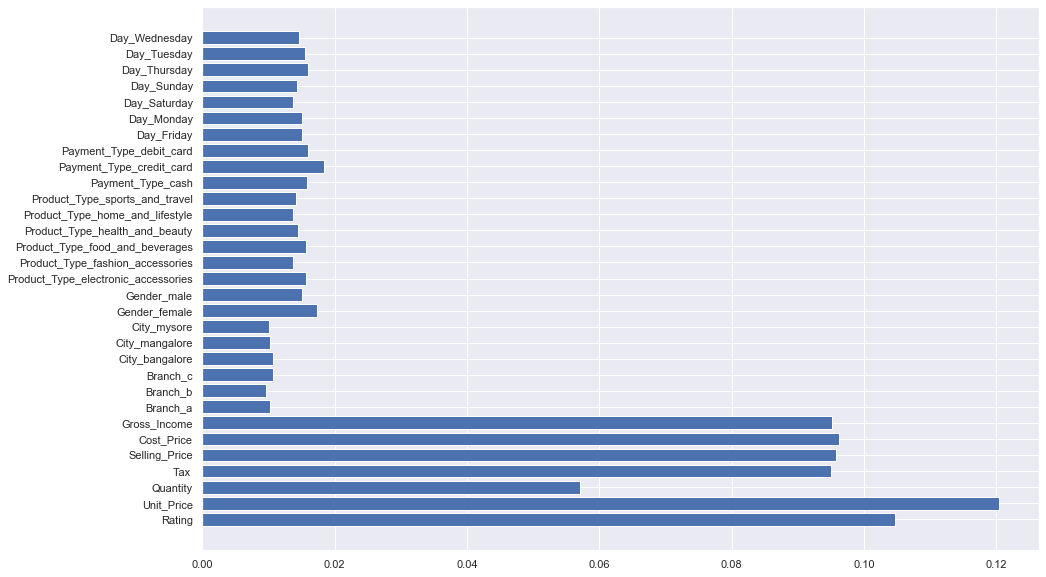

In [64]:
##Tech 1
# rf regression feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
rf.feature_importances_
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(15,10))
plt.barh(X.columns, rf.feature_importances_)

#Note:
#Rating, Unit Price, Quantity are the top 3 features

,Unit_Price,Quantity,Tax,Selling_Price,Cost_Price,Gross_Income,Rating,Year,Month
Unit_Price,1.000000,0.010778,0.632314,0.632314,0.632314,0.633962,-0.008778,NaN,-0.027387
Quantity,0.010778,1.000000,0.706222,0.706222,0.706222,0.705510,-0.015815,NaN,-0.014524
Tax,0.632314,0.706222,1.000000,1.000000,1.000000,0.993287,-0.032420,NaN,-0.017034
Selling_Price,0.632314,0.706222,1.000000,1.000000,1.000000,0.993287,-0.032420,NaN,-0.017034
Cost_Price,0.632314,0.706222,1.000000,1.000000,1.000000,0.993287,-0.032420,NaN,-0.017034
Gross_Income,0.633962,0.705510,0.993287,0.993287,0.993287,1.000000,-0.036442,NaN,-0.022301
Rating,-0.008778,-0.015815,-0.032420,-0.032420,-0.032420,-0.036442,1.000000,NaN,-0.042880
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,-0.027387,-0.014524,-0.017034,-0.017034,-0.017034,-0.022301,-0.042880,NaN,1.000000


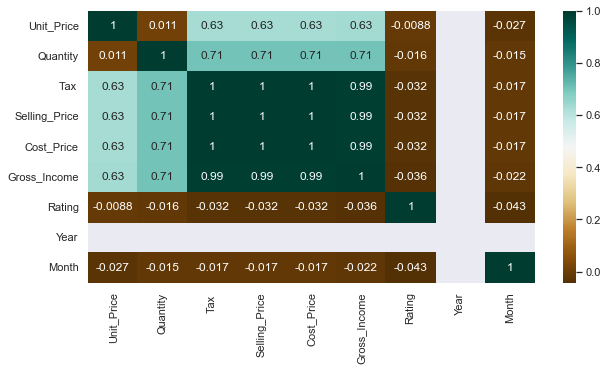

In [65]:
##Tech 2
# Correlation between variables and dependent variable
plt.figure(figsize=(10,5))
c= dat.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#Note:
#We can see Tax,Selling Price and Cost price are highly postively correlated

In [66]:
#Conclusion:
#Tax, Selling_Price,Cost_Prince are highly postive correlated to Target feature (Gross_Income)
#Therefore we will drop Tax, Selling_Price,Cost_Price features

#### 5. Compare the two selected feature engineering techniques. 

In [67]:
data.head().style.background_gradient(cmap='GnBu')
#Feature engineering techniques:
#For Categorical feature: We have used One-Hot Encoding: Which has created separate features for all levels of categorical features
#For Numerical features: We have used StandardScaler for scaling. 

,Customer_Type,Rating,Unit_Price,Quantity,Tax,Selling_Price,Cost_Price,Gross_Income,Branch_a,Branch_b,Branch_c,City_bangalore,City_mangalore,City_mysore,Gender_female,Gender_male,Product_Type_electronic_accessories,Product_Type_fashion_accessories,Product_Type_food_and_beverages,Product_Type_health_and_beauty,Product_Type_home_and_lifestyle,Product_Type_sports_and_travel,Payment_Type_cash,Payment_Type_credit_card,Payment_Type_debit_card,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,member,9.100000,0.718160,0.509930,0.954898,0.954898,0.954898,0.919607,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,normal,9.600000,-1.525303,-0.174540,-1.001900,-1.001900,-1.001900,-0.987730,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,normal,7.400000,-0.352781,0.509930,0.084742,0.084742,0.084742,0.071446,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,member,8.400000,0.096214,0.852165,0.704748,0.704748,0.704748,0.675780,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,normal,5.300000,1.156959,0.509930,1.311428,1.311428,1.311428,1.267125,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0


#### 6. Plot top 5, 6, and 8 features. 

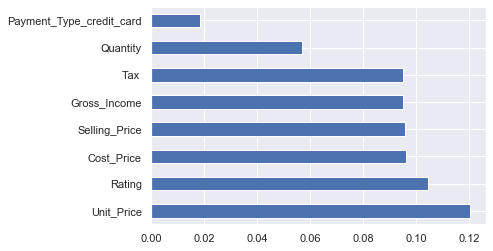

In [68]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')

#Note:
#Top 8 features

In [69]:
#Selecting features and splitting data
from sklearn.model_selection import train_test_split

X = data
X = X.drop(['Customer_Type'], axis=1)
X = pd.get_dummies(X)
y = data['Customer_Type']

#Train Test Split: 70% Train and 30% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

print(f'Total number of feature dataset: {len(X)}')
print(f'Total number of training data: {len(X_train)}')
print(f'Shape of train data: {X_train.shape}')
print(f'Shape of test data: {X_test.shape}')

Total number of feature dataset: 1000
Total number of training data: 700
Shape of train data: (700, 31)
Shape of test data: (300, 31)


#### 7. Provide a high-level description of Machine Learning models – LogisticRegression and random forest to predict. 

In [70]:
#random forest:
#Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
#One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

#LogisticRegression:
#Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for a given set of features(or inputs), X.
#Contrary to popular belief, logistic regression IS a regression model. The model builds a regression model to predict the probability that a given data entry belongs to the category numbered as “1”. Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.

In [74]:
#Selecting Model :random forest
model1 = RandomForestClassifier()
#Fitting Model
model1.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
#Making Predictions
predictions = model1.predict(X_test)

In [76]:
#Model Evaluation
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print("Classification Report is:\n",classification_report(y_test,predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,predictions))

Classification Report is:
               precision    recall  f1-score   support

      member       0.47      0.47      0.47       150
      normal       0.47      0.47      0.47       150

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300

Confusion Matrix:
 [[70 80]
 [80 70]]


In [77]:
#Selecting Model :random forest- Hyper parameter tunning

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



# Use the random grid to search for best hyperparameters
# First create the base model to tune
model2 = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = model2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [82]:
#Making Predictions
predictions2 = rf_random.predict(X_test)

In [83]:
#Model Evaluation
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print("Classification Report is:\n",classification_report(y_test,predictions2))
print("Confusion Matrix:\n",confusion_matrix(y_test,predictions2))

Classification Report is:
               precision    recall  f1-score   support

      member       0.49      0.49      0.49       150
      normal       0.49      0.49      0.49       150

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300

Confusion Matrix:
 [[74 76]
 [76 74]]


In [84]:
#Logistic Regression using sklearn
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

In [85]:
#Making Predictions
predictions3 = model3.predict(X_test)

In [86]:
#Model Evaluation
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print("Classification Report is:\n",classification_report(y_test,predictions3))
print("Confusion Matrix:\n",confusion_matrix(y_test,predictions3))

Classification Report is:
               precision    recall  f1-score   support

      member       0.52      0.63      0.57       150
      normal       0.54      0.43      0.48       150

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.53      0.53      0.52       300

Confusion Matrix:
 [[95 55]
 [86 64]]


In [93]:
#Selecting Model :Logistic Regression- Hyper parameter tunning
import warnings 
warnings.filterwarnings('ignore')
Model4 = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100, 1000,2500, 3000]
    }
]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(Model4, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [94]:
#Making Predictions
predictions4 = best_clf.predict(X_test)

In [95]:
#Model Evaluation
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print("Classification Report is:\n",classification_report(y_test,predictions4))
print("Confusion Matrix:\n",confusion_matrix(y_test,predictions4))

Classification Report is:
               precision    recall  f1-score   support

      member       0.50      1.00      0.67       150
      normal       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300

Confusion Matrix:
 [[150   0]
 [150   0]]


#### 8. Compare the performance of the two classifiers – LogisticRegression and random forest. 

In [96]:
#Model 1: Baseline RandomForest Algorithm gives 47% accuracy 
#Model 2: GridSearch Tunned RandomForest Algorithm gives 49% accuracy 
#Model 3: Baseline LogisticRegression Algorithm gives 53% accuracy 
#Model 4: GridSearch Tunned LogisticRegression Algorithm gives 50% accuracy 
#We can conclude Baseline LogisticRegression Algorithm can be used for deployment


#### 9. Present the conclusions

In [97]:
#From above models accuracy then can see that even with model hyper parameter tunning no good increase in accuracy has happened 
#We need to try other feature engineering techniques for model building.
#LogisticRegression baseline model is giving us best accuracy 